
### Problem Statement:
In this project, you are asked to combine historical usage patterns with weather data in order to 
predict bike rental demand.

##### About Data - 
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, 
rental, and bike return is automated via a network of kiosk locations throughout a city. 
Using these systems, people are able to rent a bike from one location and return it to different 
place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

######
Data

You are provided with following files:

train.csv : Use this dataset to train the model. This file contains all the weather related 
            features as well as the target variable “count”. Train dataset is comprised of first 
            18 months.

test.csv : Use the trained model to predict the count of total rentals for each hour during the 
           next 6 months.

##Data Dictionary
datetime - 	hourly date + timestamp
season - 	Type of season (1 = spring, 2 = summer, 3 = fall, 4 = winter)
holiday - 	whether the day is considered a holiday
workingday - 	whether the day is neither a weekend nor holiday
weather - 	weather
temp - 	 	temperature in Celsius
atemp - 	"feels like" temperature in Celsius
humidity -	relative humidity
windspeed - 	wind speed
casual - 	number of non-registered user rentals initiated
registered - 	number of registered user rentals initiated
count - 	number of total rentals

########### Evaluation Metric
The Evaluation metric for this project is Root Mean Squared Logarithmic Error (RMSLE)

In [96]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
bike_df=pd.read_csv("D:\\Assignments\\Machine Learning\\Bike Rental\\train2.csv")
bike_df.head(5)


,yr,month,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,01-01-2011,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011,1,01-01-2011,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011,1,01-01-2011,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011,1,01-01-2011,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011,1,01-01-2011,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Please note, Datetime was giving error while converting string to float. Hence, took year and month to simplify it.

In [3]:
bike_df.dtypes

yr              int64
month           int64
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
#Rename the columns
bike_df.rename(columns={'yr':'year','weather':'weather_condition',
                       'count':'total_count'},inplace=True)

In [5]:
#Read the data
bike_df.head(5)

,year,month,datetime,season,holiday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011,1,01-01-2011,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011,1,01-01-2011,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011,1,01-01-2011,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011,1,01-01-2011,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011,1,01-01-2011,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Typecasting the datetime and numerical attributes

In [6]:
#Type casting the datetime and numerical attributes to category

bike_df['datetime']=pd.to_datetime(bike_df.datetime)

bike_df['season']=bike_df.season.astype('category')
bike_df['year']=bike_df.year.astype('category')
bike_df['month']=bike_df.month.astype('category')
bike_df['holiday']=bike_df.holiday.astype('category')
bike_df['workingday']=bike_df.workingday.astype('category')
bike_df['weather_condition']=bike_df.weather_condition.astype('category')

In [7]:
#Summary of the dataset
bike_df.describe()

,temp,atemp,humidity,windspeed,casual,registered,total_count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [8]:
#Missing values in dataset
bike_df.isnull().sum()

#No missing value presnt in dataset

year                 0
month                0
datetime             0
season               0
holiday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

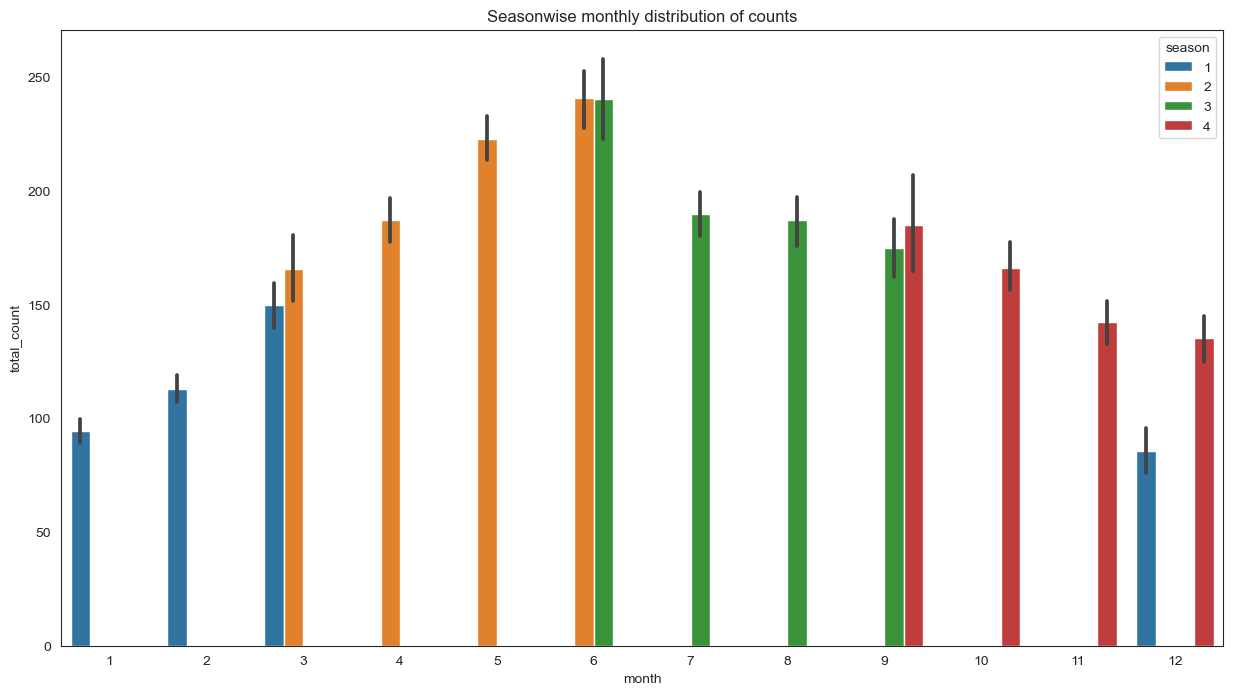

In [101]:
# Monthly Distribution counts
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=bike_df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#From the below bar plot, we can observe that during 6th Month the bike rental counts is highest compared to other months.


Workingday wise distribution of counts

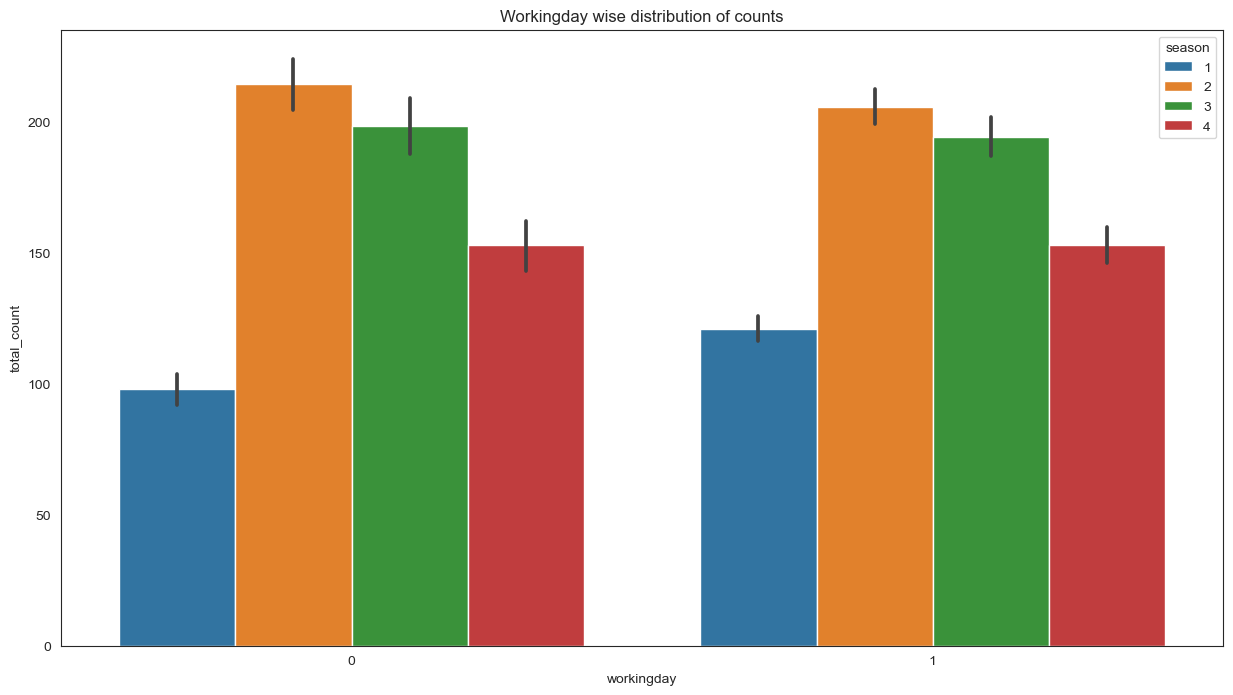

In [99]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=bike_df,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during workingday the bike rental counts is quite highest compared to during no workingday for different seasons.

Here, 0-> No workingday, 1-> workingday

### Weather_condition distribution of counts

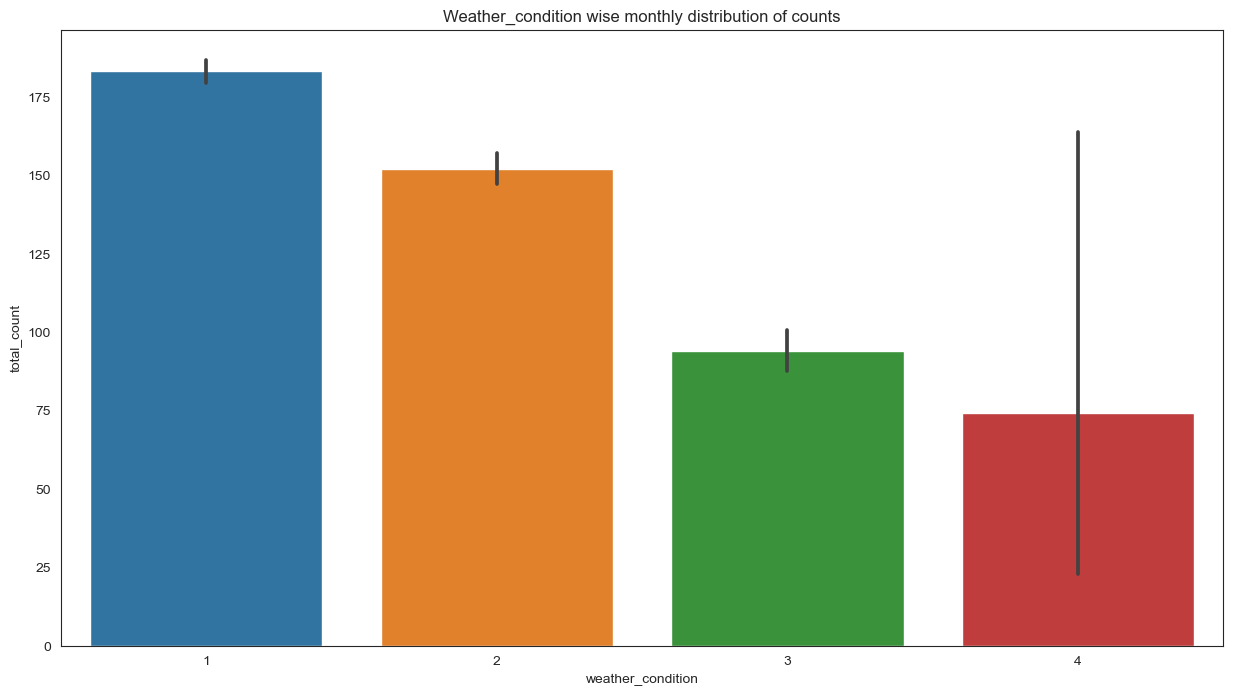

In [100]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=bike_df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

## From the above Graph we can observe that Bike rental is high in Spring(1) Season

# Outlier analysis

### Total_Count_Outliers

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=bike_df[['total_count']])
ax.set_title('total_count outliers')
plt.show()

#From the box plot, we can observe there are outliers are present in total_count variable.

### Temp_windspeed_humidity_outliers

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike_df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

From the box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable.

### Replace and impute the outliers

In [ ]:
from sklearn. impute import KNNImputer

#create dataframe for outliers
wind_hum_count=pd.DataFrame(bike_df,columns=['windspeed','humidity','total_count'])
 #Cnames for outliers                     
cnames=['windspeed','humidity','total_count']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum_count.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum_count.loc[wind_hum_count.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum_count.loc[wind_hum_count.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum_count['windspeed']=wind_hum_count['windspeed'].fillna(wind_hum_count['windspeed'].mean())
wind_hum_count['humidity']=wind_hum_count['humidity'].fillna(wind_hum_count['humidity'].mean())
wind_hum_count['total_count']=wind_hum_count['total_count'].fillna(wind_hum_count['total_count'].mean())

### Replace the original dataset to imputated data

In [ ]:
#Replacing the imputated windspeed
bike_df['windspeed']=bike_df['windspeed'].replace(wind_hum_count['windspeed'])
#Replacing the imputated humidity
bike_df['humidity']=bike_df['humidity'].replace(wind_hum_count['humidity'])
#Replacing the imputated total_count
bike_df['total_count']=bike_df['total_count'].replace(wind_hum_count['total_count'])
bike_df.head(5)


# Normal Probability Plot

In [ ]:
#Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(bike_df.total_count.tolist(),dist='norm',plot=plt)
plt.show()


The above probability plot, the some target variable data points are deviates from normality.



# Correlation matrix



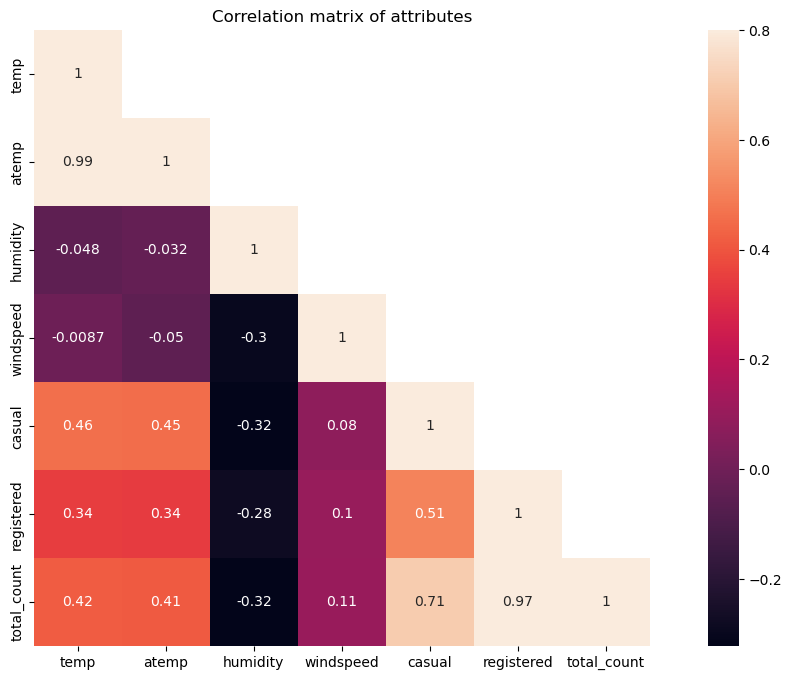

In [11]:
#Correlation matrix is tells about linear relationship between attributes and help us to build better models.
#Create the correlation matrix
correMtr=bike_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()


From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.



# Modelling the dataset



In [12]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [48]:
#Split the dataset into train and test in the ratio of 70:30

#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bike_df.iloc[:,0:-3],bike_df.iloc[:,-1],test_size=0.3, random_state=50000)
#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())


(9086, 12) (3894, 12) (9086, 2) (3894, 2)
   index  total_count
0   2646            5
1    743          133
2   8080          429
3  12714           74
4    915           80
   index  total_count
0   9984           55
1  11004          476
2   6835          206
3   6678          225
4  10533           29


In [49]:
#Split the features into categorical and numerical features

#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month']

### Decoding the training attributes



In [50]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (9086, 18)


,month,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,year_2011,year_2012
0,4,100,21.32,0.0000,0,1,0,0,1,0,0,1,0,1,0,0,1,0
1,2,47,6.56,19.9995,1,0,0,0,1,0,0,1,1,0,0,0,1,0
2,12,55,9.02,19.0012,0,0,0,1,1,0,0,1,1,0,0,0,1,0
3,6,78,24.60,12.9980,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,2,27,8.20,19.9995,1,0,0,0,1,0,0,1,1,0,0,0,1,0


Training dataset



In [53]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values

# Linear Regression Model



In [54]:
#training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

In [55]:
#fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression()

# Accuracy of model



In [56]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.3261658149062101
Model coefficients : [  1.3375159   -2.236021     9.88816909   0.58784804   0.90751941
   5.38128959 -50.25011372  43.96130471  17.62825509 -17.62825509
   2.18196387  -2.18196387   0.25164967  13.29368004 -13.54532971
   0.         -35.85102564  35.85102564]
Model intercept value : 90.88260250358424


# Cross validation prediction



In [57]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([ 83.79137472,  46.37091895, 106.38498568, ..., 150.19207396,
       207.27399919, 148.08644581])

### Cross validation prediction plot



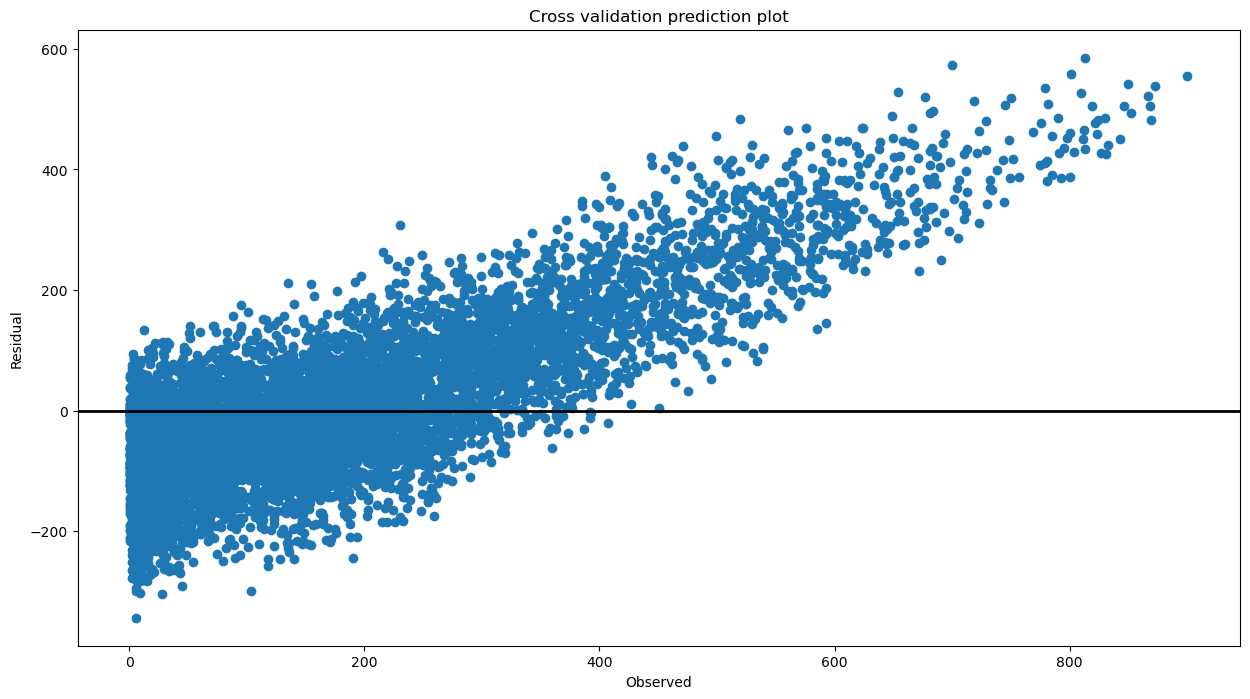

In [58]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.



### Model evalution metrics



## R-squared and mean squared error score



In [75]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.32421244938569077


The R-squared or coefficient of determination is 0.32 on average for 3-fold cross validation , it means that predictor is only able to predict 32% of the variance in the target variable which is contributed by independent variables.



# Decoding the test attributes



In [76]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (3894, 18)


,month,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,year_2011,year_2012
0,2,44,9.84,22.0028,1,0,0,0,1,0,1,0,1,0,0,0,0,1
1,4,19,26.24,22.0028,0,1,0,0,1,0,1,0,1,0,0,0,0,1
2,10,45,20.50,19.0012,0,0,0,1,1,0,0,1,0,1,0,0,1,0
3,10,73,24.60,0.0000,0,0,0,1,0,1,1,0,1,0,0,0,1,0
4,3,78,22.96,6.0032,1,0,0,0,1,0,0,1,0,1,0,0,0,1


# Model performance on test dataset



In [77]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values


In [78]:
#predict the model
lr_pred=lr_model.predict(X_test)
lr_pred


array([162.22701082, 387.44231076, 254.3643515 , ..., 120.29435886,
        14.39544931, 285.28343078])

# Model evaluation metrics



### Root mean square error and mean absolute error scores



In [79]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 128.675025983165
Mean absolute error : 97.64206668147445


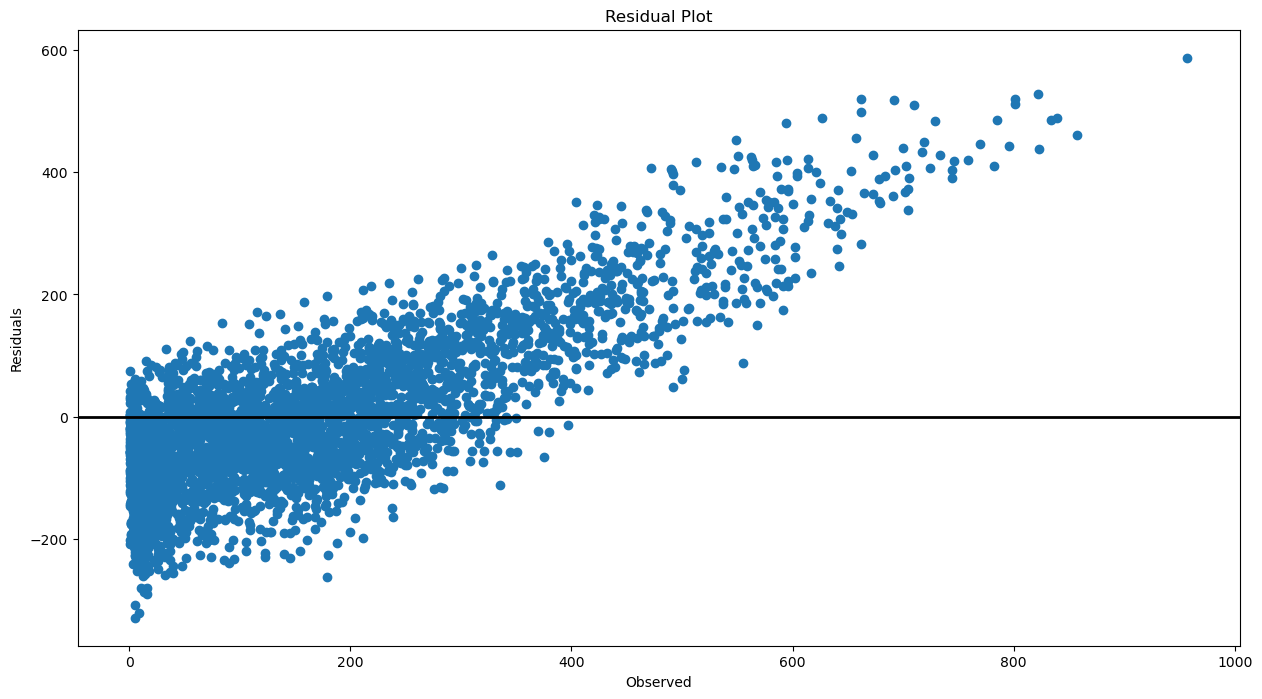

In [80]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()


Residual plot tells about finite variance between actual target value and predicted target value.In this plot,very high data points are have same finite variance between them.

In [81]:
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [82]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [85]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.3181151987513442


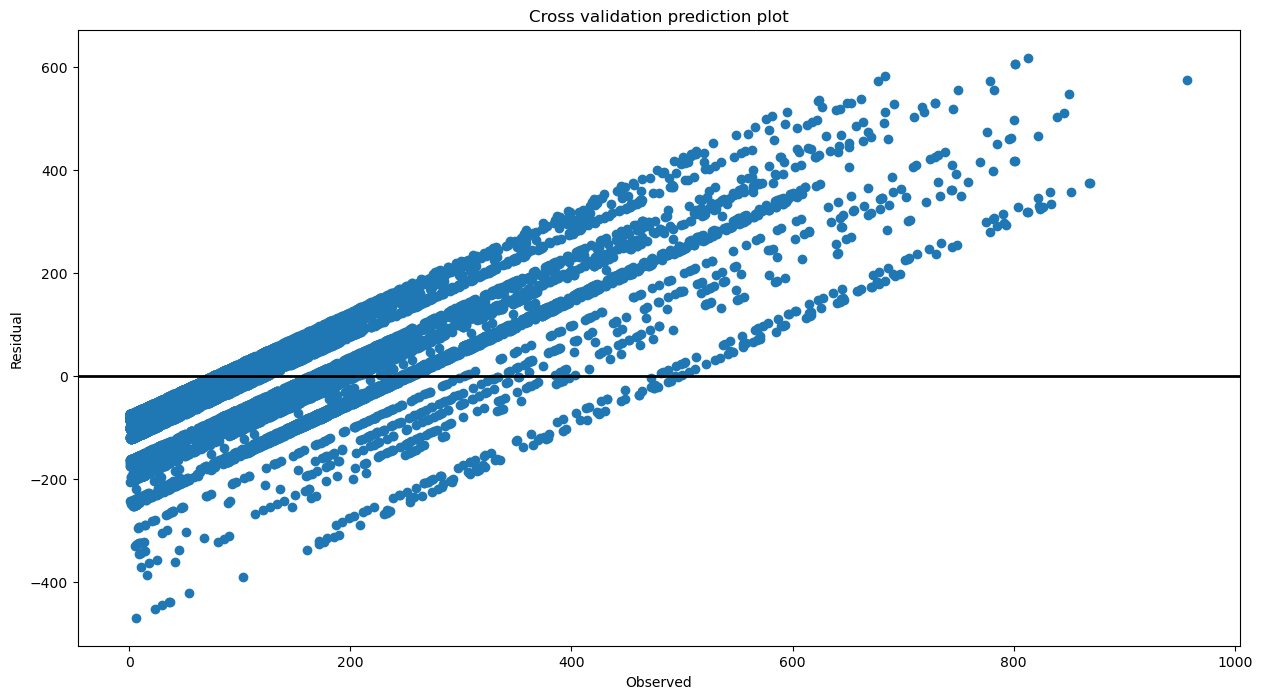

In [41]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot,many data points are have same finite variance between them.

In [43]:
#R-squared scores
r2_scores = cross_val_score(dtr, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.30539733308828937


The R-squared or coefficient of determination is 0.3 on average for 3-fold cross validation ,it means that predictor is only able to predict 30% of the variance in the target variable which is contributed by independent variables.

In [44]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([201.24291498, 250.68946267, 166.66533227, ...,  77.56096362,
       100.36960133,  77.56096362])

In [86]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 180.48186875265932
Mean absolute error : 138.6529144119974


In [88]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=200)

In [89]:
#Fit the trained model
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [90]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.8915149059409587


### Accuracy of the Model is 89%